# Script to create the figures in section 3.3.2

These figure should illustrate the detection of snow events:
- one with the standard deviation peaks (start-end-duration of events)
- one with the lidar curve and the snow events timing triangles

## Imports and functions

In [1]:
%run little_awk_functions.py
%run parameters.py

## Define dataset and clean data

In [2]:
# Pre-processing to get clean data

data_set_used = xr.open_dataset('snow_pit_1_filled.nc')

data_set_used = data_set_used.ffill(dim='time')

median_space_filtering(data_set_used, 5, x_span=7)
median_time_filtering(data_set_used, 11)

data_set_used['snow_surface'] = data_set_used['snow_surface'] - data_set_used['snow_surface'].isel(x=x_sel, y=y_sel).dropna('time').min()


---> Median filtering in space with a window [7, 11]
---> Median filtering in time with a window of 11


## Get timing values

In [3]:
# Define dates

data_starting_date_in_ns = float(data_set_used.time.values[0])

data_starting_date_in_s = pd.to_datetime(data_set_used.time.values[0]).timestamp()
data_ending_date_in_s = pd.to_datetime(data_set_used.time.values[-1]).timestamp()
data_duration_in_s = data_ending_date_in_s - data_starting_date_in_s
nb_iterations = int(data_duration_in_s/dt + 1)

In [4]:
# Get timing of events

results = get_snow_events(data_set_used, x_sel, y_sel, time_window_std, std_threshold)
start_accumulation = results[0]
start_erosion = results[1]
end_accumulation = results[2]
end_erosion = results[3]

# Convert end times into more manageable orders of magnitude

end_accumulation_times = data_set_used.snow_surface.isel(x=x_sel, y=y_sel, time=end_accumulation)
end_accumulation_times = (pd.to_datetime(end_accumulation_times.time).astype(int) - data_starting_date_in_ns) / 1000000000  # in s

end_erosion_times = data_set_used.snow_surface.isel(x=x_sel, y=y_sel, time=end_erosion)
end_erosion_times = (pd.to_datetime(end_erosion_times.time).astype(int) - data_starting_date_in_ns) / 1000000000  # in s


## Plot detection of snow events

/tmp/ipykernel_12484/3190313675.py:3: DeprecationWarning: Reductions are applied along the rolling dimension(s) '['time']'. Passing the 'dim' kwarg to reduction operations has no effect.
  stdev = data_set_used.isel(x=x_sel, y=y_sel).snow_surface.rolling(time=time_window_std, center=True).std(dim='time').values
/tmp/ipykernel_12484/3190313675.py:10: DeprecationWarning: Reductions are applied along the rolling dimension(s) '['time']'. Passing the 'dim' kwarg to reduction operations has no effect.
  data_set_used.isel(x=x_sel, y=y_sel).snow_surface.rolling(time=time_window_std, center=True).std(dim='time').plot(ax=ax[1])


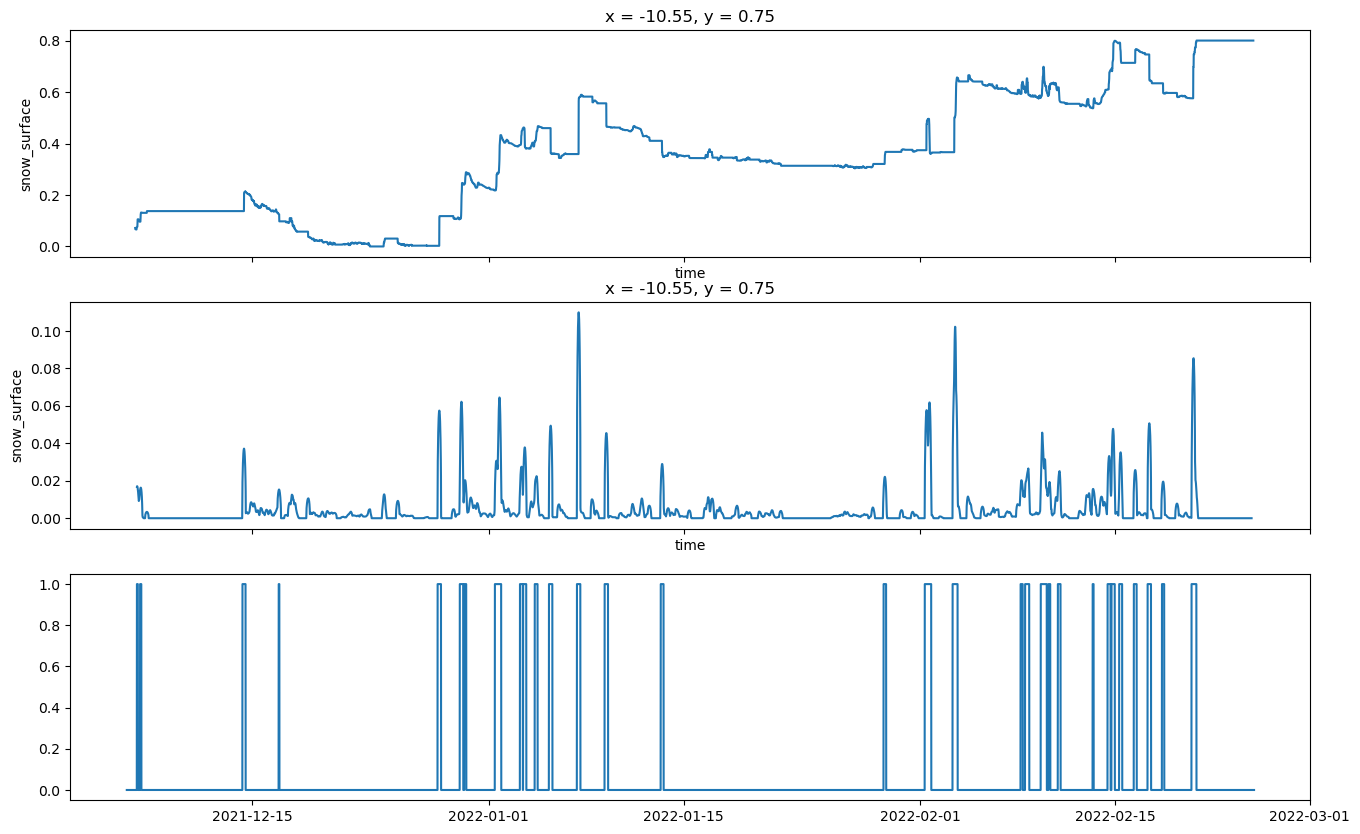

In [14]:
data_start_date = pd.to_datetime('2021-12-06T00:00')

stdev = data_set_used.isel(x=x_sel, y=y_sel).snow_surface.rolling(time=time_window_std, center=True).std(dim='time').values
times = pd.date_range(start=data_start_date,freq=str(dt)+'S',periods=nb_iterations)
times = data_set_used.isel(x=x_sel, y=y_sel).time.values

fig, ax = plt.subplots(3, 1, sharex=True, figsize=(16, 10))

data_set_used.isel(x=x_sel, y=y_sel).snow_surface.plot(ax=ax[0])
data_set_used.isel(x=x_sel, y=y_sel).snow_surface.rolling(time=time_window_std, center=True).std(dim='time').plot(ax=ax[1])
ax[2].plot(times, stdev>std_threshold)

# TODO changes axes' names and title

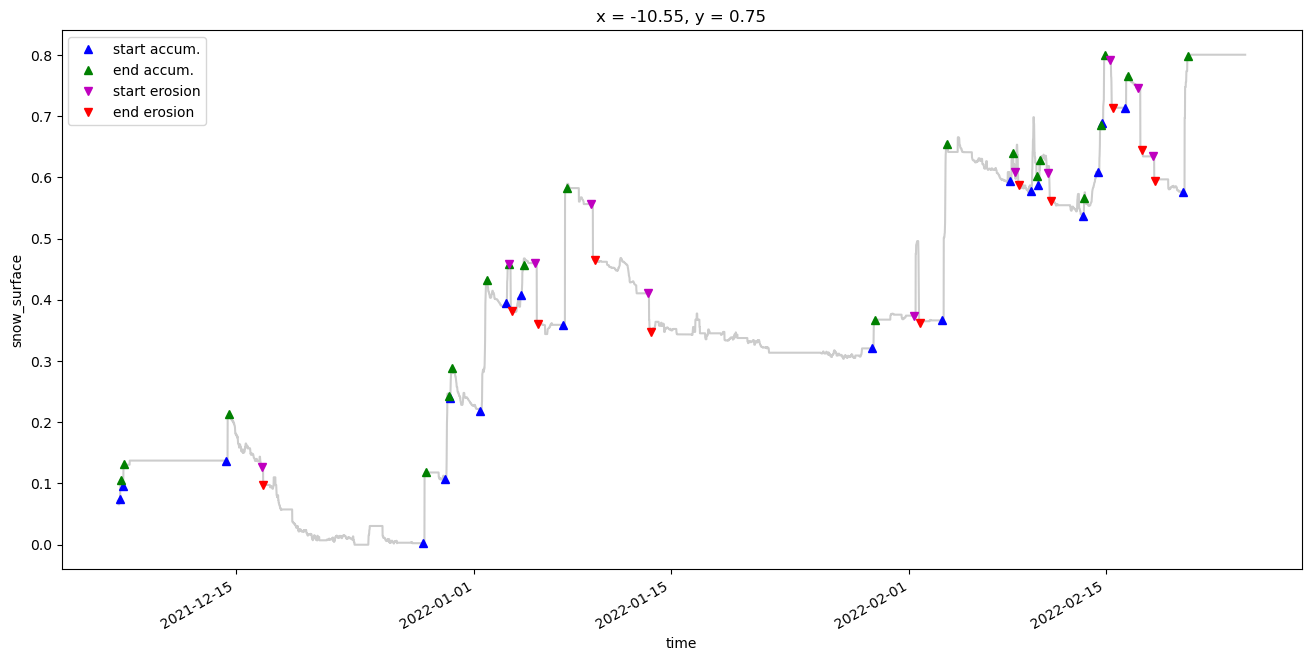

In [20]:
fig = plt.figure(figsize=(16, 7))

data_set_used.isel(x=x_sel, y=y_sel).snow_surface.plot(color='k', alpha=0.2)
data_set_used.isel(x=x_sel, y=y_sel, time=start_accumulation).snow_surface.plot(c='b', marker='^', markersize=6, linestyle='None', label='start accum.')
data_set_used.isel(x=x_sel, y=y_sel, time=end_accumulation).snow_surface.plot(c='g', marker='^', markersize=6, linestyle='None', label='end accum.')
data_set_used.isel(x=x_sel, y=y_sel, time=start_erosion).snow_surface.plot(c='m', marker='v', markersize=6, linestyle='None', label='start erosion')
data_set_used.isel(x=x_sel, y=y_sel, time=end_erosion).snow_surface.plot(c='r', marker='v', markersize=6, linestyle='None', label='end erosion')

plt.legend()

# TODO change axes's names (?) and title etc.

In [21]:
# TODO set font to latex (?)